In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [2]:
df = pd.read_csv('Gaming_Data_Cleaned_Draft1')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Game Title,Weekly Sales,All Time Sales,Weeks Out,Genre,Console,Publisher,Count
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294


In [4]:
df = df.rename(columns={'Game Title':'Game_Title', 'Weekly Sales': 'Weekly_Sales', 'All Time Sales': 'All_Time_Sales',
                        'Weeks Out': 'Weeks_Out'})

In [5]:
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [6]:
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Weekly_Sales,All_Time_Sales,Weeks_Out,Genre,Console,Publisher,Count,pub_505 Games,pub_Activision,...,gen_Strategy,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_WiiU,con_X360,con_XOne
0,Pokemon Sun/Moon,312949,12347479,8,Role-Playing,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Grand Theft Auto V,162293,13692364,112,Action,PS4,Take-Two Interactive,307,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Super Mario Maker,147107,1979933,6,Platform,3DS,Nintendo,709,0,0,...,0,1,0,0,0,0,0,0,0,0
3,FIFA 17,138161,9719745,15,Sports,PS4,Electronic Arts,381,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Call of Duty: Infinite Warfare,134299,6329596,10,Shooter,PS4,Activision,294,0,1,...,0,0,0,0,0,1,0,0,0,0


In [15]:
#need to change column names for the dummy publishers because of spaces
cleaned_dummies = []
for names in list(df.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
dict(zip(list(df.columns[5:]), cleaned_dummies))

{'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion Developments': 'pub_Rebellion

In [18]:
df = df.rename(columns={'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Capcom': 'pub_Capcom',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Sega': 'pub_Sega',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [19]:
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'pub_505_Games+pub_Activision+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Capcom+pub_Codemasters+pub_Deep_Silver+pub_Electronic_Arts+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_Gearbox_Software+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Rebellion_Developments+pub_Sega+pub_Sony_Computer_Entertainment+pub_Sony_Interactive_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+pub_Take-Two_Interactive+pub_Tecmo_Koei+pub_Ubisoft+pub_Warner_Bros._Interactive_Entertainment+gen_Action+gen_Action-Adventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+gen_Racing+gen_Role-Playing+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_3DS+con_NS+con_PC+con_PS3+con_PS4+con_PSV+con_WiiU+con_X360+con_XOne+'

In [62]:
form = ('All_Time_Sales~Weeks_Out+Weekly_Sales+pub_Activision+pub_Atlus+' +
'+pub_Bethesda_Softworks+pub_Capcom+pub_Deep_Silver+' +
'pub_Electronic_Arts+pub_Gearbox_Software+' +
'pub_Level_5+pub_Maximum_Games+pub_Microsoft_Game_Studios+' +
'pub_Microsoft_Studios+pub_Mojang+pub_Namco_Bandai_Games+pub_Nintendo+pub_Sega+' +
'pub_Sony_Computer_Entertainment+pub_Square_Enix+pub_Studio_Wildcard+' +
'pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft++gen_Action+' +
'gen_ActionAdventure+gen_Adventure+gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+' +
'gen_Racing+gen_RolePlaying+gen_Sandbox+gen_Shooter+gen_Simulation+gen_Strategy+con_NS+con_PC+' +
'con_PS4+con_WiiU+con_X360+con_XOne')




In [ ]:
"'pub_Bandai_Namco_Entertainment','pub_Focus_Home_Interactive', 'pub_Konami_Digital_Entertainment', 
'pub_Rebellion_Developments', 'pub_Sony_Interactive_Entertainment', 'pub_Warner_Bros_Interactive_Entertainment',
'gen_Platform','con_PSV'"

In [29]:
df = df.drop(['pub_Bandai_Namco_Entertainment','pub_Focus_Home_Interactive', 'pub_Konami_Digital_Entertainment', 
'pub_Rebellion_Developments', 'pub_Sony_Interactive_Entertainment', 'pub_Warner_Bros_Interactive_Entertainment',
'gen_Platform','con_PSV'], axis=1)

In [35]:
df = df[df['Weeks_Out'] >= 5]

In [39]:
df = df[df['Weeks_Out'] <= 250]

In [45]:
df = df.drop(['pub_Codemasters','pub_Frontier_Developments', 'pub_Koch_Media', 'gen_Puzzle', 'gen_Sports',
             'con_PS3'], axis =1)

In [63]:
lr_model = ols(formula=form, data=df).fit()

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     93.34
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -35173.
No. Observations:                2175   AIC:                         7.043e+04
Df Residuals:                    2134   BIC:                         7.066e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2.887e+05   5.46e+05     -0.529      0.597   -1.36e+06    7.82e+05
Weeks_Out                        5.422e+04   1836.071     29.530      0.000    5.06e+04    5.78e+04
Weekly_Sales                        6.1927      0.529     11.705      0.000       5.155       7.230
pub_Activision                   3.096e+06   3.08e+05     10.057      0.000    2.49e+06     3.7e+06
pub_Atlus                       -2.368e+06   1.89e+06     -1.252      0.211   -6.08e+06    1.34e+06
pub_Bethesda_Softworks          -8.357e+05   5.31e+05     -1.573      0.116   -1.88e+06    2.06e+05
pub_Capcom                      -1.262e+06    4.4e+05     -2.869      0.004   -2.12e+06   -3.99e+05
pub_Deep_Silver                 -2.973e+06   8.94e+05     -3.325      0.001   -4.73e+06   -1.22e+06
pub_Electronic_Arts                3.5e+06   2.93e+05     11.963      0.000    2.93e+06    4.07e+06
pub_Gearbox_Software            -5.016e+06   1.18e+06     -4.267      0.000   -7.32e+06   -2.71e+06
pub_Level_5                     -1.614e+06   1.17e+06     -1.384      0.167    -3.9e+06    6.74e+05
pub_Maximum_Games               -2.457e+06   1.85e+06     -1.332      0.183   -6.08e+06    1.16e+06
pub_Microsoft_Game_Studios       2.984e+06    7.6e+05      3.927      0.000    1.49e+06    4.47e+06
pub_Microsoft_Studios            2.002e+06   4.25e+05      4.706      0.000    1.17e+06    2.84e+06
pub_Mojang                       9.978e+05   3.53e+05      2.824      0.005    3.05e+05    1.69e+06
pub_Namco_Bandai_Games          -7.505e+05    6.2e+05     -1.210      0.226   -1.97e+06    4.66e+05
pub_Nintendo                     4.764e+06   4.74e+05     10.049      0.000    3.83e+06    5.69e+06
pub_Sega                         -2.84e+06   8.15e+05     -3.486      0.000   -4.44e+06   -1.24e+06
pub_Sony_Computer_Entertainment  1.301e+06   5.15e+05      2.524      0.012     2.9e+05    2.31e+06
pub_Square_Enix                 -1.195e+06   4.49e+05     -2.659      0.008   -2.08e+06   -3.14e+05
pub_Studio_Wildcard             -3.541e+06   1.83e+06     -1.932      0.054   -7.14e+06    5.41e+04
pub_TakeTwo_Interactive              2e+06   2.98e+05      6.717      0.000    1.42e+06    2.58e+06
pub_Tecmo_Koei                   -3.38e+06    1.3e+06     -2.592      0.010   -5.94e+06   -8.23e+05
pub_Ubisoft                      -8.56e+05   2.73e+05     -3.132      0.002   -1.39e+06    -3.2e+05
gen_Action                       2.279e+06   2.48e+05      9.192      0.000    1.79e+06    2.76e+06
gen_ActionAdventure              9.139e+05   2.66e+05      3.431      0.001    3.92e+05    1.44e+06
gen_Adventure                    -1.15e+06   5.96e+05     -1.928      0.054   -2.32e+06    1.96e+04
gen_Fighting                     -8.26e+05   4.06e+05     -2.035      0.042   -1.62

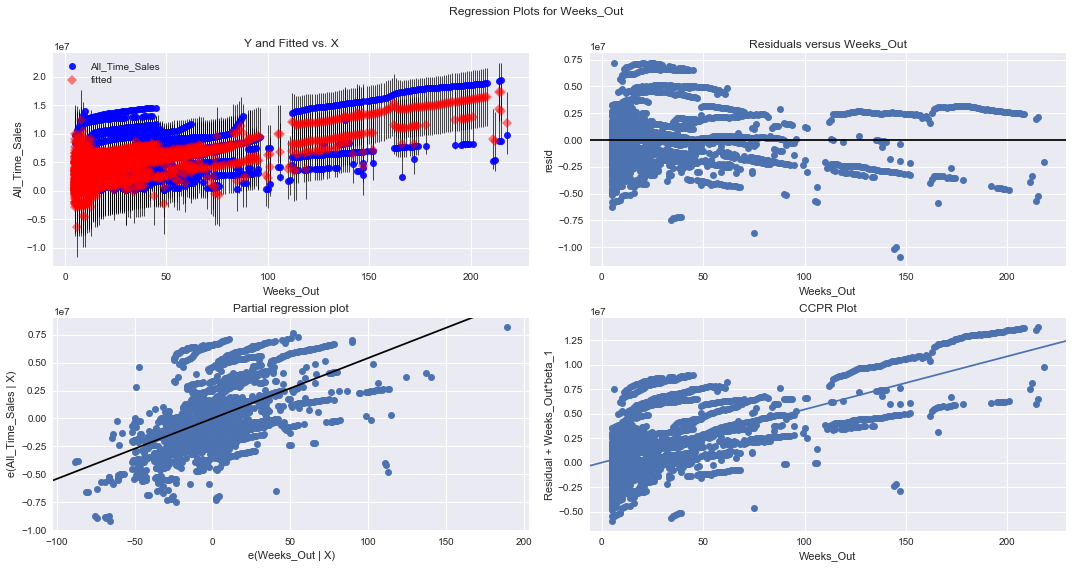

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


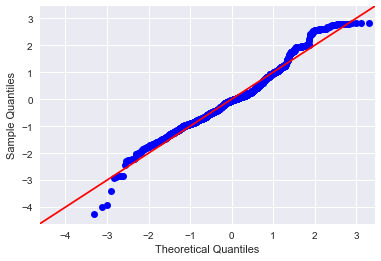

In [57]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 1.0, 'Linearity Check')

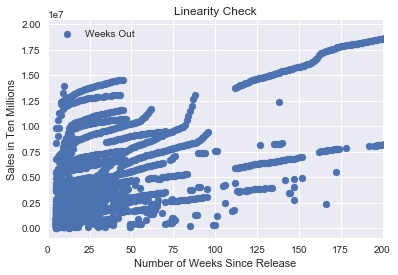

In [58]:
plt.scatter(df.Weeks_Out,df.All_Time_Sales, label = 'Weeks Out');
plt.legend();
plt.xlabel('Number of Weeks Since Release')
plt.ylabel('Sales in Ten Millions')
plt.xlim(0, 200)
plt.title('Linearity Check')